In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import wave
import IPython.display as ipd
from PIL import Image
from matplotlib import image

Nível DC: 2183.64425
[ 2.18364425e+03  1.73507000e+02  6.87357950e+02 ...  1.04688100e+01
 -9.44574000e+00  7.68860000e-01]


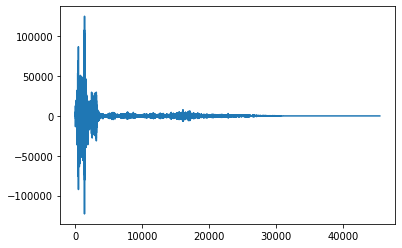

In [33]:
audio = read("MaisUmaSemana.wav")
teste = np.array(audio[1], dtype = int) 


# número de amostras
N = teste.size
# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

X = np.zeros(N, dtype = float)

for k in range(N):

    somatorio = 0
    
    for n in range(N):

        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        somatorio += teste[n]*math.cos(valor1 + valor2)
        
    if k == 0:
        X[k] = round(Ak*C0*somatorio, 5)
    else:
        X[k] = round(Ak*Ck*somatorio, 5)
        
print("Nível DC:", X[0])

plt.plot(X[1:])
plt.show()

Nível DC: 8584.09258


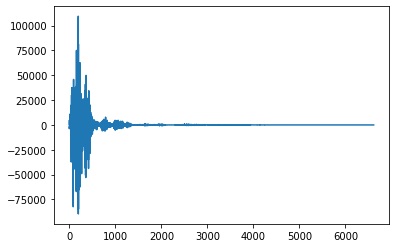

In [2]:
audio = read("Crop.wav")
teste = np.array(audio[1], dtype = int) 

# número de amostras
N = teste.size
# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

X = np.zeros(N, dtype = float)

for k in range(N):

    somatorio = 0
    
    for n in range(N):

        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        somatorio += teste[n]*math.cos(valor1 + valor2)

    if k == 0:
        X[k] = round(Ak*C0*somatorio, 5)
    else:
        X[k] = round(Ak*Ck*somatorio, 5)
        
print("Nível DC:", X[0])

plt.plot(X[1:])
plt.show()

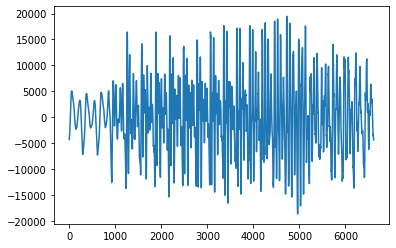

In [3]:
#audio = read("MaisUmaSemana.wav")
#audioArray = np.array(audio[1], dtype = int) 

# número de amostras
N = teste.size

teste = np.copy(X)

# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

x = np.zeros(N, dtype = float)

for n in range(N):

    somatorio = 0
    
    for k in range(N):

        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        
        if k == 0:
            somatorio += C0*teste[k]*math.cos(valor1 + valor2)
        else:
            somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

    x[n] = round(Ak*somatorio, 4)       

xInteiro = np.int16(x)

write('testando.wav', 44100, xInteiro)
ipd.Audio('testando.wav')

plt.plot(x[1:])
plt.show()

Nível DC: 8584.0926


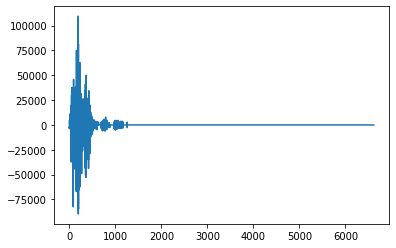

In [15]:
audio = read("Crop.wav")
teste = np.array(audio[1], dtype = int) 

# número de amostras
N = teste.size
numCoeficientes = 600

# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

X = np.zeros(N, dtype = float)

for k in range(N):

    somatorio = 0
    
    for n in range(N):
        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        somatorio += teste[n]*math.cos(valor1 + valor2)
        
    if k == 0:
        X[k] = round(Ak*C0*somatorio, 4)
    else:
        X[k] = round(Ak*Ck*somatorio, 4)

# começa seleção de maiores

maior = 0
indice = 1
# array que vai receber maiores numeros
maiores = np.zeros(N, dtype = float)
# array que vai ser um auxiliar para pegar os maiores
copiaX = np.copy(X)

maiores[0] = X[0]
        
for i in range(numCoeficientes):
    maior = 0
    for j in range(1, N):
        if(math.fabs(copiaX[j]) > math.fabs(maior)):
            maior = copiaX[j]
            indice = j
    maiores[indice] = maior
    copiaX[indice] = 0

print("Nível DC:", X[0])

plt.plot(maiores[1:])
plt.show()

-4902.7088


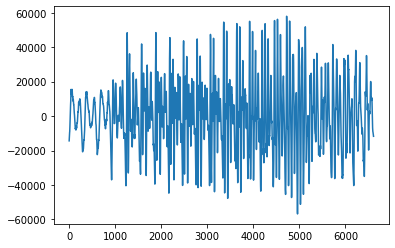

In [17]:
teste = np.copy(maiores)
N = teste.size
# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

x = np.zeros(N, dtype = float)

for n in range(N):

    somatorio = 0
    
    for k in range(N):
        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        
        if k == 0:
            somatorio += C0*teste[k]*math.cos(valor1 + valor2)
        else:
            somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

    x[n] = round(Ak*somatorio, 4)
        
print(x[0]) 

#Aumentar volume
aumentado = 3*x

xInteiro = np.int16(aumentado)

write('testando1.wav', 44100, xInteiro)

plt.plot(aumentado[1:])
plt.show()

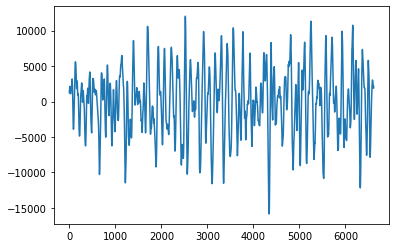

In [76]:
audio = read("Crop.wav")
teste = np.array(audio[1], dtype = int) 
Xt = np.zeros(teste.size)

#constante da operação
c = 2

# DCT

N = teste.size
# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

X = np.zeros(N, dtype = float)

for k in range(N):

    somatorio = 0
    
    for n in range(N):
        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        somatorio += teste[n]*math.cos(valor1 + valor2)
        
    if k == 0:
        X[k] = round(Ak*C0*somatorio, 5)
    else:
        X[k] = round(Ak*Ck*somatorio, 5)
        

# expansão/compressão
for k in range(N):
    if((k*c) < N):
        Xt[round(k*c)] = X[k]
    else:
        Xt[k] = 0 

        
#Inversa DCT

x = np.zeros(N, dtype = float)
teste = np.copy(Xt)
if(c > 1):
    for n in range(round(N/c)):

        somatorio = 0

        for k in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)

            if k == 0:
                somatorio += C0*teste[k]*math.cos(valor1 + valor2)
            else:
                somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

        x[n] = round(Ak*somatorio, 4)
else:
    for n in range(N):

        somatorio = 0

        for k in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)

            if k == 0:
                somatorio += C0*teste[k]*math.cos(valor1 + valor2)
            else:
                somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

        x[n] = round(Ak*somatorio, 4)
    
xInteiro = np.int16(x)
write('expandido.wav', 44100, xInteiro)
ipd.Audio('expandido.wav')
plt.plot(x)
plt.show()


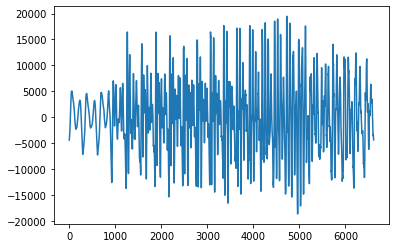

In [83]:
audio = read("Crop.wav")
teste = np.array(audio[1], dtype = int) 
plt.plot(teste)
plt.show()